In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
from IPython import display
from IPython.display import HTML

In [2]:
def crosspoints(tx,ty,vx,vy):
    # compute intersection points of peoples viewing
    pts = []
    for i in range(len(tx)):
        for j in range(i+1, len(tx)):
            X = np.array([[tx[i]-tx[j]],[ty[i]-ty[j]]])
            A = np.array([[-vx[i], vx[j]],[-vy[i], vy[j]]])
            y = np.dot(np.linalg.inv(A),X)
            y = np.squeeze(y)
            if y[0] > 0:
                pts.append([tx[i]+y[0]*vx[i],ty[i]+y[0]*vy[i]])
    
    if len(pts) > 0:
        pts = np.vstack(pts)
    
    return pts

In [3]:
def eyecontact(tx,ty,yaw_w):
    # compute eyecontact detection
    # threshold angle making eye contact
    delta = np.pi*10.0/180.0
    ec = []
    
    for i in range(len(tx)):
        for j in range(i+1, len(tx)):
            x1 = np.array([tx[j]-tx[i],ty[j]-ty[i]])
            x1 = x1 / np.linalg.norm(x1)
            
            x2 = np.array([tx[i]-tx[j],ty[i]-ty[j]])
            x2 = x2 / np.linalg.norm(x2)
            
            #print(i,j,theta1,theta2,yaw_w[i],yaw_w[j])
            val1 = x1[0]*np.cos(yaw_w[i]) + x1[1]*np.sin(yaw_w[i])
            val2 = x2[0]*np.cos(yaw_w[j]) + x2[1]*np.sin(yaw_w[j])
            
            if val1 >= np.cos(delta) and val2 >= np.cos(delta):
                ec.append([i,j])

    return ec

In [4]:
x = pd.read_table('360deg\Geidai-360-0.tsv',comment='#')
fmax = np.max(x['Frame'].to_numpy())

(array([1.5000e+01, 4.5000e+01, 9.0000e+01, 1.1930e+03, 2.1236e+04,
        4.6432e+04, 4.7040e+03, 1.3400e+02, 1.5000e+01, 3.0000e+01]),
 array([-3.004772 , -2.3909308, -1.7770896, -1.1632484, -0.5494072,
         0.064434 ,  0.6782752,  1.2921164,  1.9059576,  2.5197988,
         3.13364  ]),
 <BarContainer object of 10 artists>)

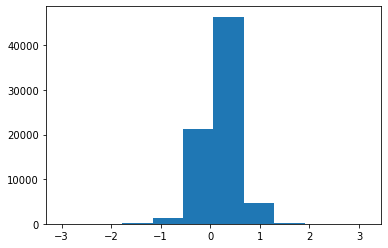

In [5]:
plt.hist(x['pitch'])

In [7]:
nec = []

for f in range(fmax):
    face_Tx = x[x['Frame'] == f]['face_Tx'].to_numpy()
    face_Ty = x[x['Frame'] == f]['face_Ty'].to_numpy()
    yaw_w = x[x['Frame'] == f]['yaw_w'].to_numpy()
    ec = eyecontact(face_Tx, face_Ty, yaw_w)
    # print(f,'\t',len(ec))
    nec.append(len(ec))
    #p = crosspoints(face_Tx, face_Ty, np.cos(yaw_w), np.sin(yaw_w))
    
    #if len(p) > 0:
    #    cpoints.append(p)
    
    #if len(face_Tx) > 0:
    #    fpoints_x.append(face_Tx)
    #    fpoints_y.append(face_Ty)  

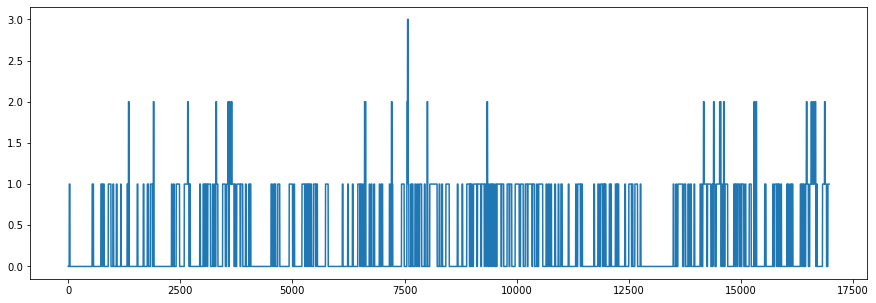

In [9]:
plt.figure(figsize=(15,5))
plt.plot(nec)